In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine

%pylab inline

Populating the interactive namespace from numpy and matplotlib


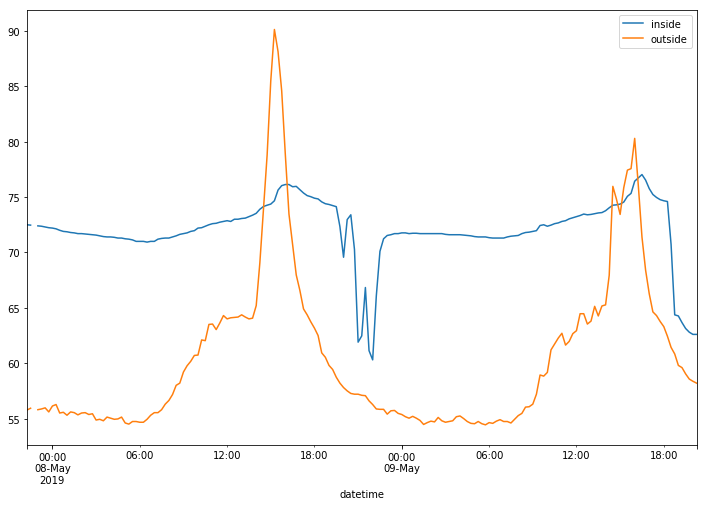

In [10]:
# create engine to connect to database
engine = create_engine('postgresql://{}:{}@{}:5432/temps'.format(os.getenv("PSQL_USER"), 
                                                                 os.getenv("PSQL_PASSWORD"), 
                                                                 os.getenv("PSQL_HOST")))

# query to extract relevant data
query = """
SELECT datetime,
       sensors -> 'sensor2' AS inside,
       sensors -> 'sensor3' AS outside
FROM temps;
"""

# run the query
df = pd.read_sql_query(query, engine)

# convert datetime to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# reset the index as the datetime
df.set_index('datetime', drop=True, inplace=True)

# group temperature and plot over time
df.resample('15Min').mean().plot(figsize=(12,8))
plt.show()